In [1]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Going to working directory in Google Colab
%cd
%cd /content/drive/My Drive/NLP_projects/ImageCaptioning

/root
/content/drive/My Drive/NLP_projects/ImageCaptioning


In [3]:
# All the needed libraries
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import urllib
import numpy as np
import tensorflow as tf
import keras
import tensorflow.keras.layers as L
import random
from random import choice
from keras.applications.inception_v3 import preprocess_input
import pickle
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu

# Function just for printing the image
def print_img(img):
  plt.imshow(img, cmap='Greys_r')
  plt.show()

Using TensorFlow backend.


In [0]:
# the model
from imgCap import imageCaptioning

In [5]:
model = imageCaptioning()

87916544/87910968 [==============================] - 6s 0us/step

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [0]:
def get_image_from_url(url):
  req = urllib.request.urlopen(url)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  img = cv2.imdecode(arr, -1)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  return img

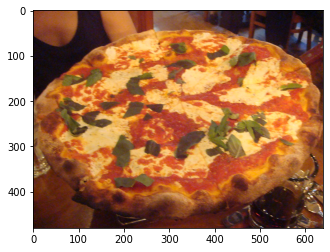

'a pizza with pepperoni and olives on a plate '

In [11]:
url = 'http://farm5.staticflickr.com/4093/4745211368_dea189b84b_z.jpg'
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

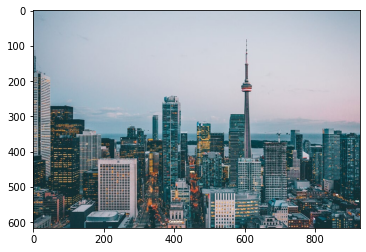

'a large crowd of people on a lake as the large tower lit by '

In [14]:
url = 'https://www.socialinnovationacademy.eu/wp-content/uploads/2018/06/cities.png'
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, True)

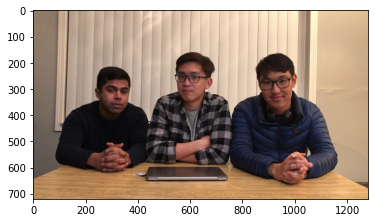

'a man and woman sitting at a table with a laptop '

In [26]:
url = 'https://i.ytimg.com/vi/JfksHZDUXNw/maxresdefault.jpg'
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

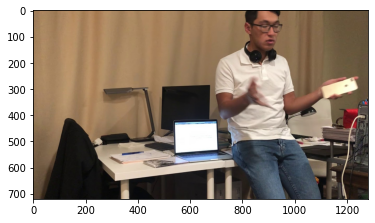

'a man is typing on a laptop computer '

In [27]:
url = 'https://i.ytimg.com/vi/uTEzqXnJMcg/maxresdefault.jpg'
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

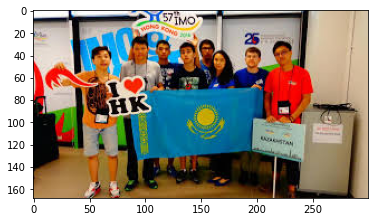

'a man and a dog are playing a game of tennis '

In [28]:
url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFRUXGBgYFxgXFxgYGBYYGhgYGBgXFhcYHSggGBolHxcXITEhJSkrLi4uFyAzODMtNygtLisBCgoKDg0OGxAQGy0lICYwLS0tLS0vLS0tLS8vLi8tLSsvLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKgBLAMBEQACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAgMEBgcBAAj/xABJEAACAQIDBQQHBAcGBQMFAAABAhEAAwQSIQUGMUFREyJhcQcygZGhscEUQlLRI2JykrLC4TNTgqLS8BYXY4PxJENzFUSTo7P/xAAbAQABBQEBAAAAAAAAAAAAAAABAAIDBAUGB//EADgRAAEEAQIEAwcDAwQCAwAAAAEAAgMRBCExBRJBURNhcSIygZGhwfAUsdEGQuEjM2LxFVIkNHL/2gAMAwEAAhEDEQA/ANZfenBDjirI/wC4v507kd2Q5h3Ud99tnDjjLA/7i0uR3ZKwmW9IGzB/97Y/fFHw39krCYvekLZrAqMXbYkEAKZJ0NDlcNSEVmnox9JOEwmBTDYjMjW2YggFgwYkiAokRJqeangOB12r0ULQecitN7+yuaemXZh+/c9ttvyqANJUpNLp9MmzPxv/APjuf6Kf4fmEObyTTemjZ3Iuf8Fz/RS8Mdwhz+X7fymbnpswI4Bz/hf/AEUvDHdLmPZMP6ccH/d3P3T9Ypcjf/b6FLmd2+qY/wCd2DchWt3lX8QVTHiRnmPZQfGK0KLHm9QoI3/2Xb7W7h0u38QVLTdVidP1nOgkgQv0p7smV7RGTTR0Gn/aaIIw4vAs+eqI7r45do/pDhL+AxA1W9btuLT8T62UKw0Eq3UAE0+PMljbyO9pvY/bqPgg/FY88zfZPcfmq8u2r4TEsbaOcM5R2FxkBOYqGFvKZBgmAwrSOHCXRjmI59QKv4X/AIVQZcga+wDy7n/Cn4OzetW7eMtkPexAzXrn2dr3ZW+zzqlu1buIYBABgkkgaVQzp7ccdoprCaF7nuT3VnEiFeK7VzvygpuO2jiLhvKuIQ2RhxfFyxYuC4ge4DYCkPcF3MiXc0IDGUx3tM/RXVP3OxsB7fbZ+F5FZDba3Zus+QEMinL3Dxk8ZMRSJpBwtSv+M8NlRg7Mr21uylq6+W20hblzIp7NTB1aPVPQwbKbyqHtnejGWnYWNntibYQXBdt3bYVlIPqhjLNodFniDzFIFAtVBu+nd/u4H33Y/lp1eaag22t7cXt219lt4dLbKysZuSCoDHiQI1UdeNEO5bHdDkBIPZO7u+kk7OsjB3LDvdsM1tyrrllCUhZ1IAUa0nuc8g9gAgyMNuu5PzRb/nY/3cG587i/lTNU+gkH0z4o+rgPfd/JKWvdKkhvS/jzwwI/fY/yUvilSab0r7SPDBqPa5/lpfFKvJNN6T9rHhhVH+G4fpS+KQA7Jp/STto8LFsf9q6frSsd0uXyTT+kDbZ/9tB/2bn1alYQpQcXv9tgakAR/wBJvqaWndOA8kC2Tde7tSwbjFmDW+PLLbDGOmsmi95c3VBrQDQW94FpVR0FRE6J1apx6rk2pgE0woJybegikpoGPQH5GkECl4VYVfIfKigVIFOTSsuHo7tc2Px/OrfiP7qHkb2Xf+XVnq1IPcjyhKHo8sfrUOdyXIE7htxLCOGGaRPToR08aPOUQwKq+l3ZVrD4u0tm0tpGsK0IAAWz3ATA5xlpzSmuCmbA3OtXbNu4S8uisYyxJAJ+7TS4pAI2m4Njo/8Al/00C4o8oTy7hYf8Le/+lKyjScG4mH/A3vP0pcxSoLv/AALh/wC7b95vzpcxSoLn/BWF4dmZ6Z3+WajTquk3mbdWFadj7q4fBqLtnDdrfYCCTIXnpnMDzGtQvkcB7ItR5Ej42+wwuPZFHu3uN6/kP93ZTMw0J1Jk8Fb3GqpL79p1eQTMfCzpxzSPDR2FDy3PXUIdZweEVLttTePaFu0ErNzvEFpaJGhMz8dKnk4hJI9r/EdbdtqFeVUrY4E5oPtaHfXuPTz/AAIhbwAW1bsJeJSMyKLjWrhUhtA6HvCCdPAEcBUU+RlPeZLa4nWiK/b+EyPFlhbQFgaeim4VLVlLi27WRmA7jEhTltrbRFbUIgVFGggamNTMA4nEHBkwLD57fPZWGwucLCrljdjEsqMXt27n2XDYS4yuWzW1N5MTDBQQSj23U8nQDhJOg2aNw9kghRlpCKYLZuIwgPYfZ8rDKVuM6i2FZxbZMqnOMhQG33dV0bWmy5EUY5pHABEMLjQCIbLX7PhrdtSSlm0ttCdDcKqFDRyGnD8qqY2Q7KeXtFM6efn6DonSMEYrr+yp1zYK/wB2nuFaZKrJ/d/ZYt3swUDQ8Pb+dMKdSH2cEGuXTA1u3j/+16cmlEE2d4CiknRs/wAqGiKV9h8qSS59ipJL32OhaSScIKSKauYUUUN0C2/hgLVw9EY/A0CURaou7CzthR0e6P3LTgfIUHe6jXtLdMCNBUJTqTxqJSBIagimmpIpD/2b+RHwpBJSFFEJpTgopqFWdoSpY2+B9wDZTMTrIMdQR4xdcADQNqFjuYWiGHuo85TMeGns68KaRSfSeNqhSCQ1qgisn9O9qL2FbraYe5gf5qexNcrBuRaLYPDEf3Y+UfSkUhsrhZsQSTTSiu4m4ttS7GFEcp46DhUkUT5Xhjdyopp2QsMjzohF7eBJ7qEidSdNPLWtNvB5Ktzh+6xn8ei5qY0nzOijbx45s/ZqSAAM0aEk68ekEVPwzDaWeI8WeircY4g8SeDGaHWvzsheL2a9tVdgIbUQdQYkT41oRZMUznRt6LMnxJoGNld128uqNf8A1J7Fmxe7UBeBQsAGiSV1PEiuIyCY8l8Y2BP8/deh4ZbkYrXu95wG/wAAf2K9tjefZ+HdVjtrl1myopBCjiZMwFnNHH12jQmrGPhtll5Buf8AtNyOIyxQ896D5mtP4+Q7KXgtvXb6llw1rJqArH1teXdjj1HEVfnw8eE8j3G/QaLJg4hlzDxI26f/AKNlSMBtK1is2dDauKoUn1lygzlI5rI1EVXzuGCKnA3egP1VjhnGnS2wiq1I+l33Uy2t1Fm2yXrR4ACQo/VUcR32MA6C2o51ly48jPZcLHYj8/AtmOfGyBzA0e4O/wAdulX5kqQzIFQshVmEkAwRw4gnQSR5TVN3CsV1OLKPkSFUyM10L+W7Hw/Piu2blqTCMSFLweYBP5T7aUfC8Rp5uWz5klMjz3yu5Bp8FHXHC+q3FMqwBWOEH61rROaWgtQmjdG8tduE1cWpLUS5s9O/7D9KaU4IFs8d5/8A5Ln8bVImoygpJKPtXHph7TXrhIVRrAkkkgAAcySQPbTmML3BoQJpAb2+AW4LLYW8t4wRbJtglSCc2bPlA7pEE8an/Tac3MK76/wkCddEbwmLLIGe21ome60EwOcoSNfOq7wGmrtEap0316/A0y06ikPeX/YNK0qSGMiaQKFKv7yLNm4OqEe8R9aVot3VG3ATNtW63Tt297hf5qT9GpD3lt+FGlVyU9LNMUgTbUEk01BFJur3PNlHvYUQkpIophXaKCS9pJ0ze4kGpXRByIk7gFP4ZB7fIj50WMDe/wATaYXEjVSClSWmptkpIrGvTpeY3sOrAQquFgcQezOtW3QsbEx7et38FQinkdPLG/ZtV6EJ/cDbNz7PZtiABKzGvrETrppPwrQg4fG+DxTd7+WipZfEJY5vDbQH11Ru9iLj+uzHqCdPdwrZigiYAWNAXMT5U8hIkcSjyXu1wTg8UAB8lIIPu+RrHdF4Ge09Ha/PdbzJ/wBRwtwO7RXy2+irpt6A8j9K3Q4EkLmi0gA909jTmYN+JV94UKfipqDHZytLR0J/e/up8t5e8PPUD9q+yP4u32uCB5qoPtTRvgGrDjPg55b3J+q6WUfqOGBw3AB+WhWJ7WsYnFsboBZEZkRZ9UA6wPmfyrIy8qJuQ7m0JK38DClOMwNNgDr80zg8PetXLTXbRVc4UGOBP01qXAyI/wBQ0sdeqi4hjy/p3cwrRalgt4Vw2HbMpPZhiDOh4nX2mtrPwOd5m5qHX/C5/h/EeVogDbN6dte/oqxa3g2jaBurhlyXQRE9+OObj3ePMVjP4xFI8NeRTTt9KvqtqLgj42uLL5nDU6dddlpW5ePt3cLbe0SDHfU6MryQysPMEDqAKflTOnf4pGh2TcPHbjM8EHUb99VM3h3itYOybt9+7wAiWdj91RzPwqqG2rZVV2Z6WMLffs2zW1c5RnUKROmpDMrDl9321FM17WlzRanh8NxA2Kmbb2vZ2dh3uWu+qlVVQdGuMNFB10gSarcPFB2uisZpLyC4aqk39+9qWz2tywht6ErkIUL4ODIPj8KtMyInu5WlQSYsjG2QtQ3T2kmKtpftzldCYPEEMAynxBBHsqQqAIVsrWT+u/8AEaemFG7a0Ckh+8d+9bw7th7Xa3dAixIkmMxHMAa+ypYWtc8BxoJO0GizXb+xb945zh8Wzlf0ty4iks0ggKiMQqCBAHDxq295ZymMtNHa66VuVYxPBIe2YkWNwL2N18aV23L2XetYS1bvyGGcwWMopIKoY+XKYqtlva+XmaoGChSMfZjA011nvGPD6VXTrWc7Z9JSJeZLNjtVBIz5yoY8yoAMieBo8vdK9aCnbC34w+IuJayNauEgAMZBOugaePDjE+cUCCkT0KKbcJ7IZuJNsH/E6j60ulojdUz0Rpmxl+5/0yPa91T/ACmlKaCazcrarPCq6kC6TTU4JDUE5NtQSXn4KOrD4SfpRCSeoppXqSCIrbHQVatRpYQdKSS7lpJJDLSRWR+n7CaYO7H94h/ykfX3VYZJcXIeh/cKq6PllL+4A+V/yq/uSv6BfNv4jXScMNwAev7rmeM6TE+QRnfna74ZA9sd64QQTrlzLmJA5kGR7Kgy8h8OOGt3sj5JYGIzIyi5+1B1d7+12qtu5s3FYssRiGSfWlmMjykAiuTy80td7Vk+q7rFwGBnsgNHalZdnMcGy4G5c7Us7vZurqjKVXMngQUn/F41tcD4h4ryw32+O/7Lm/6i4dyxCVu41PTTQfwrAySgPQlT5HvL8c9dGDUhHfX7H7LkHawh3Y189R90Y2ZjQuFvA/cBgHowgfGffXOceBhd4w7fUfgXWf024TxmA9D9D+FUPCRlBR4Cs5YROrOWP8VcXK4k04akDVehsia33dApzWlYEZ2cm5bKCODK6sukTxAHtp+MJHStYzQ7X91Bk8jIy6QWBrXp0U3a161csXEbDgOwAYjzBJy9dK7XiEORDjFzHlzdNFwfDJ8WfLDXxhjtTf1rVC7ZYLcH2hgbn9kIJA72oPELA8q4i2uN8u31XoAZorBuLtJLFi4jBmY3WYsIhpVROvDhXT8NxJMuIFujR3+a5HjHEIMGfldZcReny1+SB7/OMVftO1olEQgLLHUuJJCjjEUziuM7EDQHb3r6KTgOc3OL7b7tab7oVtXdfNbvItkLkXMrZQNQJyzOs8OHOsOHJc17XF1910M8LXMLQB5KVjME1zZaAiHsXrN24NJghrbEciQSp8hVrHeD4gb5/JU52HmjL/JDcZZBXK2JvHOZyswKlYM+2Y086rMk/uDBp+fhWi6G9C5WXcjbRwOFa0lm7ibgZ37O2J7K22Ur2jcASBmjU97hWkZmgAvNWsYwnmIYLAKd3G3ot4hjZINu8CxyNz1JOU9RzFT9LCrkEGir/bFNSUba+M7Gy92JyjQdWJCqPaSKa93KCU5jeZwb3WZ7cXa3a5g1wCZGW4AnsA5ctapsymke0VonFoaBWncLeK5irdxL65b1kqH8Q0wY5HukHyq402LBtUJGcpRXeg3Bg8QbU9p2T5Y4zlPDx6VIo1l+wcPhrNgd3Peygt4TAAGnDUCsTJM0snZvRb2NE2Ngrfqm7+xe2dLoTs2V1JPCVBkgATrUkeT+nPK42PzqmZGMJ6Ox7q7bzn9H/iQ/usG/lrU3FrGqjSq3oVTv4k9FtD3lz9KE3RCNa+h0qBSBeJoJySTQRTbGkiuXQZt6kakmOYynj7SD7KQ2QUikgV6igpuzMal62t1DKsJHUdQfEHSrDXBwBCdk474JDG8ahSwKcoFy4wAkkAdTQJAFlEAk0Ez9oU8GHT20GuDhbTaJaW7rNvT2JwWGPS+R77bflUke6Y/ZVjcpJwVtuly4h94YfM1vcHk9pzPiuc47H7LZPgjW3tkfaVwxmBaud4RIYBlaD00ZvdVbj7nRxEjb9rFX81L/AEzyyTAHeiPWjzV8QT8lLFpLNwP3ipMFAYEeA4DjXB85JpehBtjRSLm79u72TIzFrBuXO8Qxgo3cBHKSvurb4JMG5YJ9PssPj8BkwnjytTth2ldntNoHUwejLqD867XPe6NrZW7g/Q7rzzhLGzPdA/Zw+o1Cj7S2DfClQU15loBHHz5DlWJxjMZlY4jj3sXfkui4Bw6TCyzLLsAQK6kqkYewVa4hhgHBBEwwIGo9o+FcrlM8Pl9F3uPP4lkI3srAPcv2ghVG7RWEgle4C8NHXLR4eR4457I6qrxIvdA4NNHpas2O2XjRLPLAa9xp08FXX4V3WPk4A9lunqP5XneXicSceY6+h+2hWW4+64ZiuUie6SNQJ0rjHiN0juXQWf3XpGOZGwtDt6F+taq34LHWOzQLetmEXN3gCrRqrA8wQa73h00bsdvKKA0XlXGMKdmW7mt1km9epRq7h7bYX7RaYM6BzcGacyDjoOEAA++ub/qJskzuXo3UfEarq/6WbHBHdU52hvyOiAYbG/o+zLBpPFZ7o5kkk1ywFu1C7GSuii7vbaXsrhvrnW7adCoAA7xUDyAWa08WM/qHtZ2PxpZuY4eE1zu4v4qj7RZlusI0GsmZipIgCwKeSRwOmyv25j3VwyOmQrd7W45zd4NnIg+EBRWZngGY3dih8K/yji/7QPez9VVN8rdyxftYpR2dwtMDquoPHnwNX+GvtpjGwVTiDRo/rsts2JtJMRZt3kMq6hh1HUew6VfKoJW17Ya0wIBHdJnorBp8xE+yoZ3ERuLVNjgGQWqZiEt5sgzhS5bMWOp0AHDhI+NYbZOq3vC9m0W3Q2aLbYi6BAusmp55FI08NffNa+G9zmajTosnNDA4Vv1VjNW1RWcbYwX2e61u2oQN6uggodY9hgeysbJDmPPMdNwuhwpGyRg9RoU5h78ZQ2sEEx0BmKotcA8OO1qSYEsNdlE3s26rJlVTwuGSY9WzdPDzArdhyRKaA/LC5GLJD3coCR6FLUJiW6taX90XD/NU852VmNamDUClC9NJOSCaSSQaCKW3rr+y3zWkgnZpJLopIKq7jY82MTdwbnQs2WeToSDH7SifZ41Fiv5XGMrqeOYwyMZmWzehfof4KvWOxqWUNy4wVRxP0HU1de8MFlctBjyTvEcYslZztzfXtXARWW2NNTqRrrHLiPdWTkSmU6bLrsb+n3Rs1cOb86pe729yo4F6crDvECYYaZo5A6cJoYr/AAXG9io8vgcsjLbuNkn03ur7MsuhDJ9pQhlMgg27w09sVtRODjYXIzRPjJa8UQgHozw7Ns67odLxZZ0B7tuYJ/xVcxMuPHyA57gBsVnZ+JJk4zmMbZ3CsiAC1cDkADvakfdkEQNeDMfZWnk8WwOYW8G9CN9/8hYWLwPiVODWFp0IN1qP8FD8RZDasuYCSOorzfxC155D1XqMZIaL3pWTccIpuKFCyoIHQA6z5yDXSYMA/SicH2i4g/Zc7nZbnZjoHe7y2PPU39kJuXdSQIEkgchzAjpXY5TvCxnO6gfVeeYTBPmsb0LtvLdSFxz3GYEzBPurjl6MoAw6i4ygCMqQI0Gr0qBGqAcRsjWAthSkaQxJPD7j8/bRAA2SLidyjO0MY6pnU6Dn8qAFlNWPb27EN3FvcF4WxdZSVAJAJWC0A6BnB16nymwxra2TC940BKGba3Iv4Wwb73FIGUMACDLMF58RJOvgOulmGcXyhRvjNWVWbGLKXFfjlIMcKOQ8yNLb3Qipjw6tloWD2xhjbLdsirGoJhh4ZeM+Vcq7Ema7l5Vv/qYnN5rVPs7bAZgqlU0y66rAEn2kTHKa6HFhEcrZCdRv5rIyMkyRujrQ7KRthbgtBwyOjKGBDAsqkgCRMgSQI5VYyocdzvEj0N69ioMfJnZH4btlK3L2rCm00gJLAgA8TJBB8Z18aws+D2hIOq2OHTW0sI2Q3e/bP2i6IHdtjKOpPMmrOFB4TLO5VTOm538o2C0b0U7WS3gWa84S3adlzEwBmIbL4nvCI8vO42N0juVosqpzACypu1/SZh1BFq213qWGVY56cT5QK0W8Hl5C55A8t1D+pbYpDrSvcAy3ptcVgAmOMZugrjpIyx1ObRXTslaRvYUc+kjsWOHNsZbfdDp3pjqCePI+IrXjxp3QNMZAPYrn85z/ABXchCIW95+2TOt8kdB3SPAgQaxckZjHcshI/b6Kvh4OdnSckY9TsB8UK2niO0Uac5BnXgajiBBJJXaYP9O/ohz85c8j4f5T1nE21QSQNOHE1E6N7nKcYsz3UGlArqh1M8DnjqA4I09jRWi15jdbfJWmcAxJIgXt9o/3DQ6qz+jEW7AuWS/ed8yyIkBQInrxq1+pDyAdFg5/A5MRhkaeZv1Hr/K0PNT1jBcmknrhNBJIBpJJZPf8lHxJ/KkgnQaSSUKSCzzem6bO0HuLxDW7g/dUn4g1UmPJPYXecKaMjhzWO6gt/dEvSTjy7WFB/RlO0HQkmB7h86fmPJcAqf8ATeM1jZHH3geVAdibPY4lUa2Cw73Z3NBcESVB6lZIPDSq8bfa2WtnZTRjF7Xabcw1rz9L3Vr27u9gyvdJs3IBEAwZ4Zk5eypJjC08uxXOYfFsxp9v22+e/wACq3hrpw57HFWxdw7MHAIDrmEgXbU6EidQeusGmskcwEA6HqFrZWLBxFgkjrnHf9j9j+4RnFO7LnVhctRAZPVHgRxQ+Bis+aGQak2O6yw0MPhuHK7sft3HmFWsfthUVwCNJWWMDNHqqACWOvSPGpIcZziCfX4dyhJI1oKJ7rYg37IlcpGhWZIHI+Ip00IjeQ02qjXczbIpWvZOGi44tqzygUtlgDV8y5+E8JEzrU0Pjx0Yu6gmET2kSV+eijbb2cLKEwRmKIo46m4nA9YB0redxXInh8GdtG7sbH1XP4/BMbGyPHgOlEUenmFHXZdqyxF/FLbuOAcmWcs/iadPhVR8rGmiVsQ4eRKznjYSE5imwWHuZbrO9wquY2wMqjUjz0aefGmPymMNFWMfhGTkM52gAdL0tN4zaq4bE2LYAa3fRntXDGViI7vEHMJ4R94eIFphDm2FmSNdG8scKISd49ujJpoG0jxAJ+hpwao7VS3pYLawzFwmc2wxZMyBQ6nOSPVK9oTrxjrUkd3QTXql74Y227qtq69xVBGrEqOEZPDj5U5rS3UpSSlwA7KBsjZnbkg3FTjEgkk6aAdNfhwpOdSitGbe6SHQ4kBgQrDsy0MWywdQAOczw+DDJ5Jeqj7z7tDCojrfF0M2WMhQggSZ7x8qcyTmQDgdlF2Xif0LBm7ozLBLEE3F7qgcBqpaf1danaQWFpS62o+Hd7aOQImFnpOsedGfC9gOd8lLDklhPL1Q+Krpqkl3VQsnLJaOUwBMeXzNXYmSQO8QilGacng+ldCH2xV61TfaEcCRPGCRVGWONwBI1UrXEbKVe2HiEsm+1plt5gsnQyeBK8QPEiNR1rP522Wg6p/KatG9kWezRRzOp8zXMZUhkeSvTeDYwxsZrOp1PqUYz6jyP0qkBoVpFvtBNXbZM5QT5CfKpIwSaRlkaxhLiB6lNFY0pHUqRoHKKTmGvFSGXQggg+I1FLqmua2Rpadjotaw98OiuODKGHkRNX2mxa8wliMUjmHoSE5NPUaSTQRXFOooJJaHvt5KPmfrTkk9QQShSSWd7/OPtjfsp/D/AFqrl/7i7z+nQf0LfU/uj17Yxxmz8OyR2ttIWTowHdKk9e6I/rUz4jJG0jdZMee3A4jKx/uuNny8/qi13ZTYjsrp7jKFiRluWbi6HKYhlkeqdDy40vCc+nDT9wsz9Z+le+Me00k31Dgf2SsTu/mYsHAB1IgkA88snQdBy4VG/A53XarjNDRQCCbyYQYPDtdZu0sqR2isoIlmCghfNhqIIqM4UrCBEbHUFWYOJNHtOtpGxG/56qvbGx+HuI1/DvfslZDZCGiBMZWgxHUmo5LheGPFE9tQtSPihyGU5rXgdxR+l/sk3d5sIl0pcQXbq8zhsOhk6xm72pkToeNW2Mc6Pm3BWdLPCH8rGcpH/JxH2QUbdu33N0FcOIhEtkBQMiheIAJ4zAGvKjNDGDt+DfZQwSSFvtH8KP77Yy9e2ZaxVjEXrXYi0l6yrZVObui53IMliBBMdPGxjuBtvbRUMlhab76q0eiC6H2ahLM7dpczl2LwwbuxmJy93IYHWedSSbqBuyE76bOuJiLl0qSjkENyGgEE8jpWNlRuDyei7ng2VG/HbED7Q0r7oFYss7BVBZjoANSarAFxoLVe9sbS5xoBWLbmHS0uAw1wq1y2b1w88jQGUD2uPdW9jMMcdFee8SyGZGS6Ru38Cr+KFbw7P7ZDluKjKSyAz3jlIAMcBLdDTJMoMdy0T38kyLFL28xNevVVzeDZGJFi0jsq9o6K6khsuujFtYAmTl5DoKWDKTK5tEjcaJ+e2MRhwICrO1tkX86qFVwEVVa16rBQNTzzTMzzmtE6a0fqstpDtiPmE5sLAXlZX7FyEYk6cxGkHjQc01t9ConSMvRw+Y/lWu1j7rX7hJZFvXMzBF0ELodR1VBPmdJNVGxyud7h08j/AAtTIGMzG5i5tmqp1nazY6D4nVAN78FdLIFZ7wGb1UgDhHAc5PHxq6yGSvdPyP8ACx2TxC/aHzCF7O2dfBg23C6EiOJWcvHhxPvNXcTGLpR4goDX/CbLlxcvsuF+qtl/C2PsZtLh3bEMNbjHuqZklFzRMaSRzJrVkx3SSe08BlbDf5+qrMzIWjz73p8lVrGwL0gdmYJ4kiB48apfpmQjmDS7y0/wrH62E6F4HzU3au7t2FyQ556qI9pbWmS5GTkjldFygbagonIxIxbZbPof4UO1u9ieGQfvr9DT4zKxtH91Gc2AnQn5FHNgbuohL4skEeoiMQZ5OWHCDwA5+41MgZjgBFXqf2pTwZuGD/q36V90/vZi7l4dy+xtOwDWmUCGlTPdEHWDJ/MCjD4sXO2VlFouxsVqNbDMYzE6w9wbR3CYLQRWJVr0okMIClK8keR+lQkUFZv2x6J61imTVYkleIB4HNzHhTo3FpsKHLxo52hsgsWnNo443SCVUR+ERPiaF2li4jMZpDSde6hJwpO3VmP3QtH3XxWfDW+qyp8IOnwirkBtq4DjcPh5jvPX5otnqVZK5mpIrqNrQRSrDav+18lUfSignwaSCcFFJY/vRtdXxl4gMxzcFE90d1TPDUKKryRl5L7AC7fDzGYsLMYNc5waCQ0XvqtE9HW1Vu4XIEdDZJVs4AktLgrBMiGFX4m8sYXI8UlMuW9xaRrsd/pas9wE8GgeX1p6oJoq34/gKSSrHpKQtsvFAmdLZ/du2z9KQ95I7LM/Rys28YOiI0ey5P0qlxKIOY13Yq1w6QtkI7oDGa414xBkzmEhogjLxMH2R7KsAcrAwfgRP+4ZD+/2Tti4oVcsFv0c6H1SjGB8R4ZvCmuaSTfn9lIx4aBXlf1V42JhsRfwT2UtFhcT9IgVVZuJWWP3piPZVNrnic8h0tW3iIwDxRRpF/RdgcZs5Lq41LeHwzHPmu3UVhcgLoASIIA4x6taTyDssVoI3V6vbx4MWGxBxFprKnKzqwdQ2nd7ky2o0461FyHak4Hqqtht6dlImJxljtGFsItzs7TAr2jFVKBwAuYjqOA66tZjBj+YBW5uITzQiJ7tB8/L5dFCS3h8RhLmKtYa9hguVla6FAvhzqRBJPWecjjy18Sd3ihhAo9ui5riGKzwTICbHc3arLaGfZxrUihZHfIKs2fMrElyJJgA83QoeQTquetS0qx9EsMfA0KKVhcF0AerQooikhb0fdo0UVxronhSSpJNwdKISpez+FP1SpcLGkRolQXDNRlOBSWunrQ5ApA53RR77aGjQTm6lBNpLNpvZ/EKqZX+y4rUwr/UNAXbV2HROIg8ddY0OtcoRbS5ekNkkL44g47j6EIpb+lUyuuaPa+CVc4igNii73gvOaAT3GgntnWA9sMZ+mlNmfyv5Vgv4lK0U2lf9kYdLVpQgiQGOpMkgSda0Ia5QuRzMmWeUukN1opvaVKqq9noJJdttaSK7hX0P7TfxGiUFLRqCSeWkkvnHC7WyHNBhm706mYWSDpzmBHCBU80Ae2uytcO4tJiTl7tQ6ua9T8PRbduRiFKkKZDWcNc5j1rbJMHxtH3U9reVgb2UGZMJsh8jdiSR6K0BqSrJFy4BqTApE1ugSBuqxvzjrRwGKXOpJtNABmSPKoW5EReGhwtMMrKqwsy9FuIAvXrZH9pbHsyyT86j4i8Nh1U+G6p2t7/AMIEcGxLEgyuZQAsqzAsGSZBB1J0+FTh4Gn5XdWHMLnF3r8+yVhiveykBdRqZ4PoAehUxScDWu6dEW3pt/lXLG4s4vZDG2923cwQt9oiPCXrdwgZ7ijUsADz5N10LGhpVeZxcbQe3irN3Y/2dcHiLl6w73O3VC1q1mYM5Zw3dBtqARAEqD41JrdqC9FfvRDZtYnZV3Duix2lxLmg72dVIc+IDQDx7g6Ux9ggpzdlk2Dw2LYXsHaDuATcvW0gybMrm6tGY6DjoY0ES+aYtF2NvbY2laSziXXDYm3AtsTFi7yAjhbblHun1RLjS+A/mAsHdVM3FGSyrojbsom0cE9m49q4IZSOGoMiQQeYINbkUrZG8zdlzM0LoX8jtwo4NTBQpSvQQIXe0oFDlSxdHShRRpetWi3Af71j3xHnVfIzI4B7Z/PzX0U0WPJJo0fn59U42F6Op8jx9bh10X4iqQ4s29WOHw9PufoSrP6I9HA/h/hRrgKmCNfyMH41pxTsmbzMNj8+2qqvjcw04JBepLTaXpqJx1SpNRUifaYxPA0CpY90H2i0W/av8QqlmH/RdS1eH/8A2WnzUi9bHaoR+E++uRaT4ZtenYbA7JYT5pjaeHxL3AuHS88ICwtKzRJYAnKNP6VZxGMcw8w6qp/UWVkQ5LRE8gFo2PmU1ZwONsuj3rV5FZsk3VZRJBaAG5wpPsqaeOPwzQ+Sz+F52WcxluLr01J26o2LLXGCLz4noOZrJDgwcxXa8Qn8NlDqjtjDggWxoo08h+dVo2mV9lctkThjeZPbb3pOHYAWWZFQGRB6iJJERA1g8a24mAjdc+55uyEPuekVAdLDRAMl0HLpP1qTwSeqaZKXbXpKsRLWro8BkPzYGPGKXgnuh4oXD6TEzwloQR61xyoB6QqMfbw8aIg7lLxeysO7m2zdCgvZaVzfoiTkmTlYsdW8AOR4RqxzaTwbVlw92ajTlNQ6Ukl8x4UpHfBgEaLEnRuvKrrw6vZUWMYRIDMCW9hutBw/pIt27he3ZIHYWbMGNDaNwyIPCLkeyoy2VwoUPPf+FDNI4uJYB5eiK7H35uYvMATbKwYEagzwI1rLz/1ENe3oe2iz8iWdlWfklPji7sCS2UDUknUz18qzHNcQHOO6fl4ckWLFO8m33Q8hVH42ou32nC3P/iufJqfiCp2eoVOI6s9VVvRmhOKY8haYn2lVHz+Fa/Fq8D4rpOHxl2Q09rP0pWbaWy7lt3v4cjvy1y2xIVjzZSCIbTn1NZkGUx7RHN02P29FuvhcxxfH8QgNz0bbRdBeREu54chbgDDMM3eD5ROvImujD2jTsuac1xJcjO4exbtu1tLCuqpibthEtpdcKhV+0BbMuaWHEDw8SQ2SRgIsp7I3lpICNbn7uYnB4fFYe/isMlu/bZQFJuutxlyZ4AHdy6Ea8Bw5xS5MTKLimPcIh7Zpd3Pw1jZLXGOObEZwAbNu1lXMDoxZidRJ4Ee2nc4fQHX7p2zS7pumNj7M2dZxIxCNjLt4MXBd0Rc0ljm7MBjPMagzwPCrWRjywsLn1Q7flfMhZ0fEYXuDWWSVO2newudrzbNw7XHMszqSCY9bKRGuhPPXXWq3DXjKfyc3y1+H+dj0Ry8x0Lebk+f5+daQLaW0HvX2uXCMzRMaAQAAAOkCumhjEQ5RsudnldMS926jE1MoV6aBSpeJpWkvCkTSNKy7GwQMzqFgRoQWIBJOpn7vTUTEivO+M58gd7J1dfwaDQA0B1170NAasLq+G4jDvqB9TV67+X3GyMXEDCCAR0PCucZI5juZpo+S2nRtcOVwsKtbasZZGvdiDqe6eAJjlBGp4Aac67ngeYZC2z713tuOoF9dCabvetaLluJY4YSB0qvQ9L8tt9kFFdbaxEo8KZ1TeqZJp6kAUfG34WgVLCyygG2b4NsjxFUso+wtbEYRJaK4Owz27dxVLQveIExIrkpHNa9zSV6Nw6b3Hnsi2wdsnDXWfI7Zhb9RoMo5bKeoIMR41NC8NYQTSk4viPyJg9osBtHbue5HzUrfLe4YxbdoYdrTrdVyzQDolxYbXh35mpnPa5h1WTi4xgnZIb0Pl29Uh2TDWizGTEkjn0C1iU6d4aNlq5WSZbd0CM7Hwwe2rnMGZVYieEqDHDlNa8cLYhQXLzzukdZU59noeM/D8qlUFlBMRsG3edlCdxJLQozMQASAQNFAIkjmY0g0bKW6bXcewFXtLUORJ9YanjGo0BMU4yG0OUKNht0MPqrKCVMTB1HI+t5j2GmmVydyhOvupYAjgOMAuAPGA1N8VyIYFad38RIjMzcYLQTE8JAFMu04ClZ7Z0pIr5dNaKopTJAB016EE+0Dh7aCKsW59/ILzfeOQD/NJ+VZvEW83IOmqu8P4UeIZDQ73G6u+w+Ks2yjox6mPr9aysjcBT/1nIBLFE3QNaTXrp9lI2lrYcdVcf5T+dNgFStPmFyTD7vqgXoubv3xGpRD7mP5itXikD5Yxy9Cur4bOyN55uquW0UZ7bqujFWAnkSK5+KmvBd3XRlvM00i+G3tvIgUYVR5Xg86aRmVYH510A4linfm+SwH8Myhty/P/CCWHe7ev37toWzcZMqgg5VS2iQCNIkNp41m58zJpGiI2FoYOO+GM+LQJ7JfZlSZETr+VVZonMIa7suV47kCTIAbsAst3gvOmKvAOw75OhPM5h866jEIMLHeQ+iUB5oh6K/YNpuLrxI+P/mt3iZ/+JId/Zv7rmsRtTNHnX2UzHWzkJPEZeHug+Oo18fKud4RkD9W1o/u5t/S9PLT7LUzYrhJPSv4QRuNdcTqscbJ3jTidExcFC0l2kkimH2fmslx6w1Hjr6vjoNOck9K5nL4s6LO8F3ubH0P92o6E67ih5rXgwRJjGQe9uP4/hE9kbQUA5j3Wgz0YAAz0BGXrHM61hcX4e9zqaNW9O4Oora616C9wKC1eH5bWi3bHr2I3vy/bqUTu4y2okuvhBknyA41hR4c7zQYfjp9StV+TE0WXBV3GP2tyDAzGWmO4i6QTrB4zqNSRXWYTf0cBk10FN/5OOumuo7aEECxRtc/kO/Uy8vc6+TR5/vtroou2bKo8LxgT7gB8vj5Vq8Anmnhc+Xa9PPv+eSpcUijjkDWdv8ApDydK3CVm9U2TRtORDdi2rYnKyhgLbtBAOoZBOvmaqZryGUFoYTdSVZsTsHCOO/hrRnogHxUaedZJc4irWo11ahQTs0qAtvKqCMqqdQBy9kD4zxrMkweZ5de62YeKBjA0jbsurshEPaoGDkd7MhjhxUgd3/zQkwS5nKHKccbcRyubp6rt/YnbCVKi4NUJYiGAMSACY4yOk1FFgyM3IrqEX8ViOgBQjG7mYshu7bcQcqq4hRyUZ4qbwHtIr59/NamNxbCETmvJsg7jyVlw+Ce0gDLHADhyAHLyqyQuZsE6Kbh8EzglY6caACS5hdmPbuElSyEGcrLIJInjxBjzo8pTxskYiy0IoLsFXKO0yhgOQ5SOGvzoEG0XUdgoRwjqSxUhYAk8zJ+GvHxprgaSCh7SuZbVw9EY/A1Haco25l4mNaVoq/2jpTkl8v1oqguUkUY3cuQzjqAfcf61SzRoCum/pmQCSRncA/L/tWuxjFVI1n/AH/Ssl8Rc61X4vwLLz84yWGsoAEnoPJKt4gurT+sI9gpFgbVd1R41wuLAw2Nj1PMLPz+QQ/0UXf/AFF1etmf3XT/AFVvSbKmzdaVirU6xr1qscaKT3mgqwzJlj91xCA4u8S3ZW3AIILMdWAP3RGnXXlpTWYGM06t+FlPdxKc+yH6+gVgwtsBRp7efvqdkUbPdACgfLI/3iShW0f7Q+IH1GlZHFWjxGnyWNnAcwKy/fW3GKc/iVT/AJQv0rR4c68ceVqziG4grXsu7Nuy/Hu2yfEwJ+NdRI3xcQtvdpH0WC7/AE8k+TvujWPB7NtNDw0IiGB48+Z8ia5LhZjGWzXY9wbsEfDpf5Wtl8/gnsfKuoQJuNdm5YQ2TtmjaY5JNFFKFK0FJwt+AUYkK2sjipHBvGsvPwy97Z4wC9ulHYg7hW8acNBjd7p+h6FLW73pLZT+JdQxHMjl18+VQOxrjDQzmH/q7Qt8gevbfaxdaKUS06yaPcag+ZH5rrSda9+K4FB6IZjUcNNIJGvWqgx2uceSIuI7uHKD62bPXTZWBKa9p4HoDfyTAvLGo7szBPeuHlmPJR/ueNWHY8peA336OoHsMB35R1ce/wC2yjbKwNsjTt/c7tfkouIxBclmMk1q4+NHjxCKMUB+WqUsrpXl7tymiakKjTbNTk8BE9yzOKuHpaj3up+lUM46ALUw201XpazFdXAr8wrCfLT26TUbpKoUf3UwjaRYITy2VEmI8tPlUg1URNJFsKW0Ygj2x75g0OYWnhrqulPSjSaoG2n0QeLfy1E9WIdk/sxotHRoLH1RJHCmgaKw00bT9y6v4nEaahtdTrpRLSpRIOwSTdX8bCPA+A5jyocpQ5x1Ch7Vug2tGzd4An4014NJpIJ0CqO8Txh7v7Me8gfWoWjVOXtyR3QaR0KKv9o6UUl8wVpKgvUkVO2HjhZvLcIzAAgqdQZEa1FK3mbSs4jwySy4jzG6M4zb1u45eMkx3QNBAA091Uv0z11EHFseNgYST5kKfsfGI4gGTLcjwGSfmKrZET2CzsuZ/qLiJyQGMHsAg33KY9FRjGsP+i4/zIfpWrN7qgj3Wp40aTx6QKbEU56q+iXzJALMDx5EQKp5D3DKaelUs1zy3Ib2/lWrDGVq2DqtMjRB9ttDL5H6VmcTFlvxWTxD+34rNt+1/TI3VI9zH/VVnhh/0y3zT8F1sI80V3euE4a31GYe5mj6V1kHtYwHqFkZwDckn0KtGMjs9BrDaaaCAZA4jnPDh4VyOFzNym8x6t113siux8hrvveq0puUwmt9e3/f7WgTV2blhhOWTTRumvCW4qUpoKRTQilHhQ6pLtq6VII4j2/OmTRNlYWO2O/RSRvdG7mbunWxka5EJ4kkEyesTFZ//jqHKJHBu3KKArtdX9VaGX15AT3Ov+ExicU9wy7E/IeQFWsXBgxRUTa/c/FRzZEkxt5tR3ariiAXGeoSNUQ1NzRTkZ3FH6a8f1E+LH8qzs06hauL7qteMwruVKXCkBh4HMAM2nNYkctaoq2Ckf8Aql4BG0bQmATkhMukwXkmeAMCYpaI6J5doXQVDWokqJJjjA4CTMz86SVBOLtq3oH7rQp/FAdgo1H7Sk9A0mo/CaDYCfzPqr0ROxdDKGGoIBHkRIqRMQ/bbd5PI/P+lV37qzD7qk7LxSqgBYAyeM0WkUplOGNT8a++laKV9pT8a+8UrCSFbdugqIIOvI+BqN50RCpG97xhmHUoP8wP0qOMe0nFENzF7godU5Xi3wopL5grSVFeoJKTsxFa9bVhKs6qR4Ex9aZISGEjek+MAuFq9HdHDn7hHkzfnWWMyTutI4rFI2fu1btGVzDzM8RqB5wP3RUc+Q+RvKVVycFsjOUGk/ulu4tjE9oHZiVYEGAIOtWm5Jk9khO8AMbdq6XDPOrTBSgdqqBvVu092/nS4EgaAgnXMWmR5imS5LYzRCUcHP1V5weI7omM0CQOR50miynuNaKp7/4HEXeyNnTLnzd7Lxyx58DRkMbQC9QeD4pVD2zs3EW7avfOmbKvezcpJ46cKdC6M/7aHgiPYIrulem0yc1afYw/MNW5guuMt7FYfFGVIH9xXyV4dgU5SU+af1+NcY1kgn60H/s78+S0CWlnqPsq81d6VzoSQ0U2katSUaalGoURFLjr0oEIgpCvypqJC5OtJGkljSCcAkmn7IgJi5dHUe+mkgKVrD2SFvpzdfeKgfPG3dwTvCkOzSo9zaNuYzT5AmozlRD+5Tswpjryoju/t9LT3CCsuEgsSB3S08uOvhVGeZkh9kq3jxvYCCD8Fb8BvArAZhzOqEMOOnAk8ImoOUqcyN9PVT7e3bWktHXMCIEEzr4gD20wp412RNMQpMA68aSS9icgALKDqBqAdWIX6j3UkgpFpAoAGgAAA6AaAUkUK2yf0i/sj5moH7q1F7qjLUdqZdJoJJDGm2imHNNtOpVnfW5+iQdbq/BWP5U+PdIqwbpLCLTU5XO3wopL5frRVFepIolsrZlxnVssAEGTpwM6VXmnY1pF6qxFC7mBK0PD5+tYhC0SVMRm60aTSnLN5laQdac1xabCa4AiiuNjsQzEAqF6ga/Gi7OfVA6qzFhRcvMRa9h2JmdTJknif9iKj5idSoZhyuobJV6/dUzbI4cGEinjLfGaOyfDjxyglw1TWGxNx2cXWkiCIEAAyIA9lKScygEpksLYjTVW/SGALFuP7z+Vqt8O94+ioTtACr+5rntyo+8p+BBn5++t7GnbE4l5oUsnPx3TR0wWbVh2ztlcORbfMxIzQIiOAmTx7tSx5WISXsbZ718TuqP/AI3JI5XkDyu0IG8oPC0fa39KL88D+36qaPg5d/f9FZMLZD20c6FlBjjEiYrPfxwNcW8n1/wrA4F/z+n+UKw+0pv9gF4MwLTyWdYjw+NWXcVDYucN6d0z/wAJZ1f9FLx+IKNCxBBOvUVTHGpnDRoCvwf0/ju1c5x+SiY7FsLdohoZ45CDpPTSmt4nkPLhe3kpY+EYjZA3lu/MpnK9wt+lZYgQsDlOulRniWQ0CzdqWbhmI11NaAhu0MNcVS3bOY5En6U+PPkkNEqJ2FC0WAPkEDa+3NmPtNWedx6qENaOibpqcnbdhiJFMLgN04MJGiIYVIGvGoHu10UrRSTaXU+elFx0Ca0a2E3dvOjShIPUU9gBGqjlYH7i1Lw+9GKQR2kj9cBvnU4Kr/p2dBStm3N6PsuINk28wCWWZlbK2Z7SXDGkcW0pjKIshOfC4e6756p/Bb72DoblxO8rRcXMJUyNVJgT8qcWg7JlSDpforHsjeIGSt1L/grieH4TwOnxochQLx1BCJY+6GeR+EVVk95XYtWBN1GpFwmkikMaako7mmJ6qm+b/wBgvVyfcI/mqWPqgVbd2l7q+VRg2nK22zpTkl86bN2HcugNwU8+dWZchrDXVQxwF2p2VjwG76pyk9TVKSd71bbE1uyOYbBgVCQpESt2qbSRKXloUha5koUgvWjDEVTeKeVpQm4wk2vvHqfkIqdo0VHJPtrzHWoMhtEFWcM2CFHs+u5/ZHuk/WpYx7AUWWfaCq3pDumLK9S59wUfzGtXh4ouKy5zsED3QYjFJ5PP7pqxl/7RUcXvhK3xuZsR5Ko+Z+tNwhUQRmPtIfgnEMuUszMmWDwjNIjnM1bEXP12TWScnRWzZu0SLIBPeUFYkfdJA+AFY+RBUprqrDZbFoBhNoFLwusPXnMTp6x1I8PyNaMuMHRFo6KLxtUfa72jKARJ7o1AktAAEnXWs2OF2wCv40zWk8xULEOxZLeXVCS3Du9noxJ5RrU7IiOcqGOT/VafNQbuMZL1yNc0c5ERoRHnUvggxtB6KPIluUlqaxmMd1K5TrHCetGOJrXXahMhcKQhquKJcFJJFMC4CiRVWUElTxuoJS3hLDx+FAsNApF2qWhA+PzoEFIKThkET1NRPJBUsZ0TO1bY7I+BHzp8DvbQm91TN/knad5ehtL+7atj6VaaaZarnVyA49AH04QDy+lKJxLbKMvvKTsAjt1HUMv7ylfr8aedkwbrY7ZqkVME9NJFJJoIpt2pqSYuGhsnKn71tOIsL0DH3kflUjNGkpXqr1sAaDyFRpysqHSiksw2Qoa2hjLKjQjh4VXeKceqsN2CKphqYipCYenWgnxaoILht0Ekk26CSj3lhgeo+VVZm0QVdxXaEJvBmUnxb+I1O0eyFVyP9wrt/lUM49m1Lhmn0mbBgE9Sfy+lSRj2Qo8k29VffywWtpcB0QkEftZf9NaGC4Bxb3+yoTjS1XN23jE2yP1p8spq3ki4ioY/eCXvQhGIZjwYAg9YUA/Gm4hHhAIy+8o2y8O7sezMEc+k6fnVh0ojGvVNawvOiM29ikDvEk1nuyNdFMIaUPE7MuBYkkLMDpPGPcKuQ5bAKKa/HO4Q5rTrDEEcCp4RzEGpLBOiiohccmBqeftnjTRulql4e2QYIpsiIUu9IXjULBZ0T9gvNsa6ydqzKi8jcaCw8BGtP8dodyAEnyCk/TuLeckAeagXcDcWJRhIkd06jrUrZGO2KidC9u4KdsnuimOFlNBUW68kmpGiggV17h5HkKQASsqdYxBgVA9gtSNeaUixdLMqHgzKPewpnJQsKWN/ti0T33vj/wCpYlhydh7oX6U8NJZSc8tbRA1VbxlzM0+FSxihSrPdzG0/sQTiLI/6qfxAmnu90po3WzWzVJTpeakUk2zUEU0z0Eky700pyqG3GzY22OiD4s39KkZ7hS6rQtirpUacUfXhRQVKwuDgVVVpS0t0EE8qUUkvJSQXClGkkgrSIQRLBbOtmyb10AqCYkkcNBEESZkRUjYWPHtItke0+xuqZsfEATZLm4ykuznLoWMC33REgLmMSAXiTUmRG1oAaKUTS93tO69Uf2OLbX1V4IIaAYgtoBIOvMnTp41DHGx18wUjXPGrExvJhVtX+zBHqK0AAcSwJ0EcqMrGiuVA85HORofsqTtrbXZ3MvZm4i+trALESFJg8jMeXSpYcbnZfNRP7Kjku5vYBQPCpcvXe1grrpHADkB4RViVzY2cm6UMJqwpW19nO8GJIEVDBO1nop3QFyZw2KxDMs5V7McCApbgMsxLsfpUz2RBpO9/H/pUmf6b9LtW+yjRrWQd1rUvPhCadzUjSEW92ANCxYcQCdF8hwq0cxxGgUTcdoNqXc2EpWIHwqITuBu1IYweihpu0c0l2IGgB1jyJNSuzCW1Si/TgG09i9gI/GRHSmRZj4j7KcYGu3Qe7u/ct3A1qDEEZj8wRwq/HnxOaRKN+yhdiuDgWKVtFMXfEXWUKPupoD59arxvxoTcYN9ypniaQe2fgFFGzIERSORZtR+CAhlzZRB8KsNyBSjOP2KZu4FuVPEzSmGFyWLRUdY4+FAkOKIjIT+x1LYnDjretD/OtOoUUCKS96LmbHYput+9/wD0aiAA1Ne4kqJh8IbjBQYNNdIGC1Jj45mdyg0i+wtlNbxVvMykq6yB4o7Seg7oHtoCYSM5mpSwGJ/K4rTLb1CglM9BFNM9NSTD3KKcEw1yoyEVVbr5toHwCj4A/WpqqNN/uWmbI4VEFIjSDSigq6LdVNVZtLCUUktRRQSqKSSxoJJFkKXUOcqyMx6Dn+Xtp7G2aKBvoEne3a9rILFtGcLrOoRGOqgD/wBy50XkNTAq2WtaLcmw5D2v9k76H06qmbI2OyaxGkAdB0qoZOZW8iXnoNFAbBF8Oxt37TtbV1BIIJiAY1WdM0gEdYjnSYRzUVEx72tIZueyI7zbbt4grbsuC6uDc4sxAVxE8BBP05ippHN5TahdBI0Anb11+XRV/F7GDGTm5SAxAMcyAYmqokc3ZN8CNxtw1UjDWVQQAAKjLiTqrAaAKGyfYWzxpJJsW08KaQinAF60KQXQy0qRSGvikikNi16UkEj7YOlKkCU22M/Vo8qNpl8Ufw0uVK00bjHkKfSBKbZSeQoUmqLcwxPKpA5JMvgZHDn/AL+VPEiFKJd2USZEg+FSNyKFFN5BupGwNmH7Zhp5XrR9zqfpUonBFBBzOpQra+HJvXXj1rlw+9yfrU/iDZVzGeij4R8rA6zoBHj/AOKDgHNpOgcWOsJ3aGMupdZlcyQJMDUDhxpQNaGABLLLjJZXbW8mIHNT5r+UVNyhV+YqXhd7L2YB4C8yuaR7JppYEeY9U6N8rk+qY/a+hFDwglzp1d8uqn3A/WmmHsjzpY3sXmPgfpTDAnB4ULZO01bGF20DsIPTQAT4GnPYQykmuty17ZXqiq4UyM2zpRQX/9k='
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

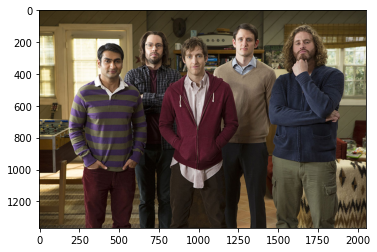

'a man and woman in business attire standing next to each other '

In [29]:
url = "https://cdn.vox-cdn.com/thumbor/xz5o9rC3nb5BOq9WY77WyjhQaJQ=/0x0:1019x679/2050x1367/cdn.vox-cdn.com/uploads/chorus_image/image/31098683/siliconvalley_promotionalstills2_1020.0.jpg"
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

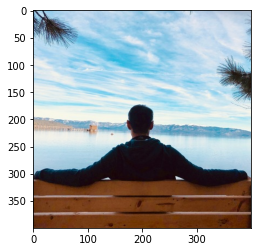

'a man sitting on a bench in the water '

In [35]:
url = "https://sun1.dataix-kz-akkol.userapi.com/jqmKa62ZQdcDuFCqvUdOBSMo2Vm6fokiX4EZYQ/u8d2pDE5AEE.jpg?ava=1"
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

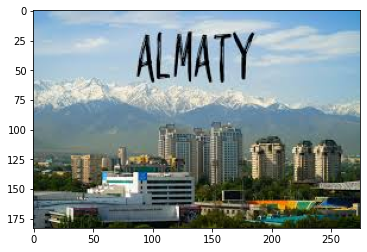

'a large body of water with a clock tower in the background '

In [36]:
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFhUXFxcXGBcVFxcYFxgXFRcWFxgYGBYYHSggGBslHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS8tLy0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAEAAIDBQYBB//EAEkQAAEDAgQDBQMIBggFBQEAAAECAxEAIQQSMUEFUWEGEyJxkTKBoQcUQlKxwdHwIzNiguHxFSRDcoOSssJTY3OTohY0NbPSJf/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EAC8RAAICAQMDAgMIAwEAAAAAAAABAhESAyExE0FRBCIyYfAFFHGBkaHB4bHR8RX/2gAMAwEAAhEDEQA/ALsCp8PE3pwZp4ar13JNHkpNBbTg5VOHKBSmpULA2rmlDwbxn5CCK53Zpgf6Vw4g1OEi84kndV3JUHfedO787fGqwkLOI5bJVSbwY3qVLv7XwrpcPMUrlwOo8kiGhUoA2oZLyhyp4xB5VDiy1JEiqiVTw/0FPQZ5ClTQWmCGagdbJ3mrQsjmKHdQByq4TJnG0V/cU9OF8qMbbJ2FENYIb1ctaiFpIqyxG4phTV93A6e4Uu5HKo+8FdEz5RTe7rQ/Nk8qXzVPKq+8rwL7uZ0tU0t1ozh01EvDJpr1PyJfpzPFFNUirxzDI6UC80n8mtY6yZnLRaK4ophTRikUkYYq0Fa5pGWDACimFFWquHq6etDOYcjUU46sX3E9NrlAJRTCmilIphRWikZuIKUUwpooophRTyIcQXLSqfJSosnA0ZTTSmiQinhPQV5udHqOFgnd0g3Rgaroap9QOmChqnBmj2mJ3ipmmo3FQ9UtaRVhmuliNRVxKRfeoXXQdqS1W+w3ppFcEU4IqfKKVVkTiRBFAcf4sjCMLfWCUoiwiTJAgSYm9WZrA/K5jIwwZBuqVQNbXOto7tL5/dFKUqRSVs13B8enEMoeQCErEgKiRci+UkajnVH2R7QuYt7GBQSG2Xe7bgHMQCoEqMwZyg6b1J8m74Xw9gjkoeRzEkepNV/ydYdKFYvL9JwE8pzOi3uAoTewUtzYmqPgfaNL+Jfw4AHclQmc2bIoIJiLXJGp0NX1eT/JxxAK4hiXCf1hXzslJWrXQ2Qn4USe6QRWzZquH9p3nONOYPOBh20E2SmSoITJmJHiJHurYcZ4o1hmFvrJIQBYQCSSEpSCogAkkC9ePfJ9jO+4y+4d23T78yJ+JNar5UcblwvdTdYUY5hIgi/7Klq/w6yxtNmjdNI3PZ3jzWLw7eIQFJSvNCV5cwyqKTOUkap51mX/AJUsMEqWlp0pSVCSleU5VFMhSUKSBI50H8mGICuHtwbJJT7wEk/EmovlTbJ4etKEiVuNJMASZWIH+bLR0/bYZ70S8E+U5zFPttowDobWqC7mJSkfW/VxHmRRfYnti5ivnDT4Sl9h1SVJTITkkgEA3sQQfdzqw4GYwzA0hlq37ia8/wC2YPD+JNcQQD3bvgdA5gAKHvSAodUmq6airZOeTpG/7U9pRhMM4+oA5RCU/WWbJT956A0/s1isRiMM068lKXFoCylMgAKunW4kQY2msd2uaRj8SxhQqWxldUU7hWkHqjvDOv6MjevSmcUlIgCKbtP2oS3W7Im8Ao+0Y+NTJ4cka3p4xfKktSjpFS5zGoxGKw6ByFN75ArvcE611LAFK13Y6fZECn50B9KY4ysjajIrmU86Mq4FjfJTOYBfSut8LJ1PpVvkG5pFQrT7xPsZ9CPcrv6NQNvjTVYJH1R8aOWqoVUupLyPpx8ARwSeQ+NKiYpVXUl5Iwj4Jw6KcHhQgFOAoxQ8mFB4Uu/HKhwmnhNGKHkyYP075xUATXYoxQ8mS97TSum5aWWikK2dzUs1cy0op7AKawXHMKMVjX0m4awrqYv/AGiSlJ8wpDv+at8BXj3ZjtA6nE8QUyyX3HHF5AAfZK166Ap0gZgbqiaiTXBcU92ab5G8Rm4fH1Hlp+CFfYqpfk0d7xOIULjOQP8Au4g/fVP8jKloaxrC7FpwEp+klRStKp2/swPcaM+RF1Rwbp5O5Z8khX2uH1qVLgqS5N/iAUJKiLAE+gmvDey7JaYRiSfbGIBkge2pls/+IcP7te2ccxeTC4hUnwsumfJCq8lxXBnHOD8OShpbhzuFeRBUQhxTnigbjMkjqKJNthGqO/JhhSjiRzaqwgcNoMuFpRnrKjWp4xh/nHEQ3YhppcjqpHgPvzuj3ULwVvJx51EARgm026JY/CqTgvaBxHEeILaaLy1LKUJAOiFqAPKLaZhM70J0q+YNW7+RcfIs5OCcT9V9XoW2/vBq5+UEf1ZEmJxGHE/4qaznyOKcQ5jWXE5ClaFFG6VSsKHkIA9KuPlcxpRhGSdPnTU+SQtf+2mn7BNe80vCE/oGf+k3/oTQna3ggxWEdaP1SpKj9FaBmSfhB6E0fwn9Qz/0m/8AQKm4q9GHet/ZOf6FVcm6IS3POfkawilNvOruUqDSbeIAJTIJ3AGWBtK/rV6OU1ivkPH9QcJtOIXHkG2v416B3QOqqiE6RU42yBDKtrU/9IOdTgAD2q784Tyocm+wYpdwVa17zTQVneiS/TF4inb8CpeSBRWNTSS4eprpeNM741VN9ibS7k4V0NP74DaglvK51EVGl075Dq0GLxIqFeK/M0KqaYRVrSiQ9Rk5xB5ilQuWlVdOJGbLECngU1xxEHIrMoHSIm8W/GntvJOxHv0N7adKxyN8RwFOApxTGxIiZi3rUmHYWoZoAH7Ri87GKnNDUWRxSiimWDFwJM2GwuNfX0pYkoQMzhJ/uxfkOvu/Cp6quium6sGilFdcYUAF3E+0IJyieURYfjXGlhRgETpEjX+O1UppicWjsmuRUzrJSAVWkxTctCkgxYPiXMiFL+qkq9ATp7qyHyScNLXD0qUCFPLU6Z1gwlPwSD+9WyLl4g++3WpC2rLmICRqZmY5wBO9JtWNJ1R5t2dR3PGuIMRAdb70dScq7f8AcX6VSfJb2wweDwrjeIcKFl5SwAhavCUNgGUgjVJr0DHdmlK4mxjkLCQhtSHEGZWClYQRFvp7/VFFYHsrhGgpLbCQlRJKSVKSc2vhUSI6UirXcreM8bZxXDMW7h150906mQFAhWTQhQBBhQPvqz7K4Yt4LDIIgpYakftZAT8SassHgW2xlabQga5UJCRMATAHID0qSPz5WqkyHwYHDDL2heUdDgwr3Duh/tNTfJPgVJwi3nBC33luGRBy2SAfeFn31oP6CHz/AOe59cP3BRH/ADAsLzTyERFXEUIbex51wpPc9oMSjRL7OdPUwhR+KXKk+WlmeHpP1X0H1Q4n/dV9xbs0XMfhcahSUlkLSsGZUkhQTEWtnXrzqTtvwBWNwimEKSlRUhSSqcspO8AnSaXZoO6ZY8JgsMkbtNn/AMBXOLp/QPf9Jz/Qqp8Dh+7bbRM5EJTPPKkCfhUrjYIIIkEEEdDY1dkmF+RtuOHTzecI9ED7jW6y0DwXhDWFaDLKSlAJIBJJlRk3NHzSWyG93YgikQKaSa5NMR0imGlTTTRJw0010001RLFNNNI000yWzhVTFKFdNMIqiRtKuRSoJDXeHDvMoJ2Mgev2aVY4bh8EEqgwJmL6a7Hf4UHh8RBUpSJnLmmwSI1voL6U5/iKdCq2moNzcSeUfbrXA5Sex6CjFblyDpfQ3Glz1oEOqSVBtKSB1t5gD6NBYvF5EgXvJsLE6xyAiT7qjbWVDMFSFRYWBmZEHTeBOs86Sj3G5di/U3KLQDsNh6a76zTFBCblMkCfEJgW0At6VQs8YQ3IJJFxlFwIgDTb8Ka72iCmoIBuLCb+fSjpzH1ImkYUVQeg3NrcjG8/CqviWGGdWWJnNY32meUH7RVW52ocgAISB5nraRQL/G1qUFHUCOkchyH41cNHUTsiWrBqjYYVQAGYZj1Gn4USXABISBsIHPraKwzfFCFFSSR0JkRFtfTlpVsx2kRkyqsSI6fDSpnpTRUNWLLp/Etg+GCqBHvkCDt58qExjpyFNxIJ3JURFidhNufxoFGKAkiCo/SJsJOxGu/pbmeN4zMbkjw2OwI2CRsYiKlJopuwjhXjSSoKUQAEiwFgLz/GjO4ISSZMRPM8zAqt+eAEiwA1G19vKfT4VOvFBRgWnXyuoHz66Wptu7QklVMOw5KkiNDOnwnnb3VzELJ8KSCmeUAGZ13P561X8NelSgddFJnSNTM6HX31BicaEqOX2T9EEm19Z3O9KnkO1RcqZjl56DYdZ51wtJJgHbWZ1JifzvUGEfSoHPa4TG29jHP407EgApCJEnWSbqAgxuYipyadDxTEvDkEgX8t/KmhszH213H4tCEwpSQSPMxrMazM1WHHqcOUExqBMlW++p6fzrSMpNWQ4xRalm0XkgmQQIjzp7eDJEiPt+IqnU+tR8QORI0n3ARr0M1bYXiYFlQLTlGbMAdJtz8tRzpNyQ1GLICneuZamdxCAs+MTJJA1HmB76k7tDoIQ7CtYBEz5G4p9XyT0/AKUdajIotrCqA8e0yed+lB4vGshQSlYPOL38/hGtXHUt0iZQpWzhFcNPTcEi4Gp5efKklsnQVeRniQkU01MtMa7a1FPL8KpSQnFjDTTT1CmAzpeqyRGLGGmkVMWjyM0lMEe1a3rSeogwZBApVN3I5/+JpUuqg6cjOK4gszKjGw6DkBpvULr5USSbmoIrtXaXA3b5LJXFFZAiZAEAEfbzoVT61A3hPIWT6C09aFmlnoSS4BtvkeFU9LkHodRUU03NV2TQSHo300/PupinOVRATXVHalYUdK6WamU9IpthQ9t5SdCR76Lw/ESCCq8UEpydq5HWpdPkpWuC1RjY0g68tDa4339aenGAnkD1MA206fZVPBFSIPnrUuMRqTL/D40JXdMEwJ1toT6UPh3UyVKWBEwIN4091VnfGNbD4TTVDkalQRTmy0HFUoTlGZcxM+EWMxa53G1CucWeIjvFAchYDy3FBVwmtFCKIc5MeVk11KqiUoAEnQXqNOJSSADc6WI2nccqq0TTLRPEFpiFHTe9uR5jpTF49W1vFmJmSTzJoZKCQTBgRJ2E6T6U0qEb1NRKuRMcWq8E31vrXVY1cAE6aHcDlOvrQmauTVbE7lm5xd1SMinFFPKfv1PvodnFhKgoAGLwrSRpprQyKaaSUeBtvkszxleYqEg30JvOszqOh+FFDtO6BACPPKZ+2qGa5mpOEH2BSku5ZP8WdV9KB+zb4670xnibiTM5hyM/bqKBVTxT9qXAb3yXeH4glZ1CTGhNvcfuowY5KRbISqLiTBBmfs9DWZCa4oCsnGLLUpI2Qxo0SvKALnYkjWhTxJOa0kTA3J21/P31lSetq54hofQ1C0Y+SnqS8G7axbUDxp95v8aVYoYxz+YFKo6C8j6z8EGY07NQqHudSpXVWIcpVcIrlOAqlIVCFSJHOuJFOpOYYnFmdK4hsmpBXZpdQeI75vAJP58qiKTT5pTSU2Dihik11KK7Smm5sMToNC4t1SVASoBQBTljSSDM7yD8KIqV6QWCMp8SJkbd7B8Skxo5oDUSkXCKbK7+jFIWUFEISoDvVJgQFQFTHMU9D/AEvTO0DxKlwTlUSIJzAALSu2g1HKqUYa6pSsSVaDnB/4Z3HwFKDb7lTSXY0odJSYuYMDrFqCTjfFBIjeEqtb37x61WtWMQQfEAoggm4ObQXtReIxmUDKlKFKUgEkrVnbg5ibwDmSDAvc1WbWyYlBPlFxhWkOLCFXBBPL2RPuvFDttthJWpcRZJSpB8akqyzBNiJqLsm9mcR7KvDNlKNzAOhUrdW3voLibhSEgWzZVEc1JWtIPiuLW5VMpSbpsaikth7uNHhyEnn44zXIE5p8rR611fE5WAAMpywcwJEwDboqRNC4dsgeJIBB67KB2Mak0GW4gKEWI22P8a0VRM3cjTqSIpoFdRoPKhsZj0twDqZIHQamaOpQsApOtOWqazGK7R+GxQCSAIVMztBFvjUTfG3fCoqBF5RlF+XjER8aXUHgzUnrTIriHAQCLgiaRNVmTidJrjc1X4njLSDlUTMTZJNpi8aaUVh8SFpC0mQdD+dDTzFQVmqNS5qt4jxdDQMgkiLJjcgbnmahwPHm3F5IUlR0zZYV0BSTepUiqLfPSKqiKqaVUWKiXPSofNSosQhHMU4HqKB7ySPECTrb8TepmsM4sSkiNJncD1PK1Z3Zq0krYYhfUetSpX5etUreKBAk+Le1v51wYq+qT+dKBbIvg55U7PTHGWVDMhOswCVWgXk5770bg04csh1LaldFGSdLCFD62sHT153rJK9/r8zoWi262BO8Fdz1QtPKAuSTPTbXerNLSktocK/bzHLBsAopEmb3BNaZqyOmwwK2/N6WPltSBmSoLuCARa8a+Q23qjPFCF5IuCOUGb/dVk88rEnDrSk5nJITMn2iIn3U3aa8BFJp+QkKnSko04YZnKk94SolIKQUgifP8mnOKaaebaKAqVJkqV4oUFRKQRAkdJ91c8/VQjtv+nguPp5S/wCkWap3tWTpdF/8RreB/qqkxD7ySpSG8zeZSUkmc2RRSoggRYg+URUf/qLKWw83lIUmFIuQErSpWa99B+bVs5WrQoxxdMK46qSd/ErruN5V9tB4pwZ1zGq+X1T1q54hh23gbqSQ2XiuA4VI5BIVqbHWsl/TAUScq05idbRIIve1Gjqp2vAaumyycPiT/fc08k8ppmMILjINwcgP+dQI/PpXFquP77nXZPOocav9Iz5o/wDsVVt7kxWxcdksTKwCRGUfVj2+qiNqF4ho1/dGlv7VfKB8KXZB8JXmKoATJMnQKP7Y+2oMbiUqyQZgAGeriyNZ2I3ofxDXwnXj4lf3l7ftI/Y/PXaF4+Ifv9N08gK6+oZl6e0vlzT+3+em4+KeCSCTuvlr4fOtXwYRW5rcAgKUgKUEpJEqMQBzMkCPfU3HMa2208takNrbdDbMIQkltSWSspUJUCcywSlVxbaqjDOoWBkWknRQUoJgiREqImY2rSducKlzDypIUAjNmJkBZU0nTOozlUr868eo1aOvSTplEvGqewbjmEU8FEJHtuSIVCgCVWED40sTxFhjDoL5flxtsWWspnuUBUpS4L8zQHZjGpalJTKFATYQDz9gg6/neTtgNCPZ8MWOXRuYkBPoBU4+6uxV7WBdnlnxxmy2yhR+idIv51rkcOR3LS1jN3zim4JISlORfiVCCZzJ5+sEVi+BriRecqYABN768rTeNq23ZptCkOlUSkZwbWhJgj/MdxrWmo6iZQjczI9rcMwh1xtAGVsFANgtWUKUJOW91ESIsAKsewDDS8M66seBsFRSknMSATqBcwis/wASwDbTqsgCZ7qfFM52gs6n9o6Vc9hGU/OssSC04IF9YH1T5ba0N+zZlY+7dBfbIMNsNqbS3mxAClgqjKAJTCSrw+KTaLVge88YASnNE6npBBmxtXoHbjhSVuNgpghbKEwoyAc8WjWUmsblBMkX9/Kq0X7Raq3Lvg+LUsKCjJmQbRGmo60ear+AYZCWHFZoUXlRaTASiwFrSZ99W6cMFNFwLSAAMwKTmBgTHiiqeokZOD7A80qIabbWMwdZg9F+W6qVLqx8/syenLx/j/ZnMHxFxhUtvJJISkgKOZWWAkZYEi5AjnVrj8Ri14f9O0oJSQc615dJjwKIvfWOlYprEKB8IBNvt+HnRzvEipalOIDhIgCwuAAD4IsAKyuKfBpbqrCzxB0ey0sjolWh3Fq69i3MoytJ5z3fiveDI8/jUeA7RPMElBsYkEApMaCDQuLx6nllajckmfMfRTt7rUdV91t+IYxrk22HUtbQKAmSkkzmSACATz6a/CiOEK/qg98EHqi8EdNJ/hncDxFktpQtJUcggHKkA5ReVEDnYa21q4wjpRgyrITCVGEm59nS/wCftylx+Z1Qdu/kU4V1mCJmw+yi8TxFSg22GHISAMyUqUm6iqbDS/OqguGJAKTaAoEkT0P2Vu+xPDwvDhTighGdY7xafDYkakgCTaK6tPSU27dUm/6OXV1Xp1S5aX4fMzvDEtoecdxDLqgnusgSIuc0khQOYW0igGeL5VHuFKT3anO7mJShWZQgxrEjpJr1Bzs9hlG+OZCTGYIIQSBtmQ4I39RQjXY1lCQG+IYcAG5LTazy1W4aaT7hkuzR5YeIQpS4AVCTmBImQI0G001/ipUZIkzJJUok9CdxXuXYzs+3h3HXBiGnytLYORppEZSq5KCZmdDyryDiDBzugJObMowEnMAVGPIGDfoa6/S+njrNpuqo5fU6s9NJxfJWu8UzJykeFIUQnMcom5AGl6XzlJTmKUmBuAogKRpcbBIjltFbZPHmYurBHT6DQt5elcXxrDzmHzWYIAJRlghQuEwdxoRp1rmfyR0QtfFK/wAjHYHipyZdoSi5BhPtDRInUbmPdFDYVoFQQogiEhQIkKGUTeLfCtqeOM5vbwqUjRCMoA1JupSidee1dX2hY2cYB5haKhRptruXlaSszil3H99f2J8qg4g5+kZ/c/8AsVVtiXkvGe/bUobNxcDeAon31meO4sJKOeQdfpL/AIU3dgmqLjsyMywkEjMki0k6L2g/ZUa2ssGdf9rridIHL87Q9jn8zyZjXeOSz9IEb71NxBcBPISNo/XL9358qT+Ia+EkfJlevtL+tzHShsc3miZF17kfV5xz8qhxuKCS4SB7bgPsTqOnTfleo38akLI2ClibRcgTb+7VuSoyS3FhnsswTEzrcH3+deodrXJw8a/ormQbhbNozqPPlp6+Rq4mLhQA1y8s0wM87azW8492vZew4QjMVFtJMyAm6ZRdRv4ZnSK49W7R0aTSvczODN5t7KeX4dKkx+IJTlJJSIIE2Hs6Wqow/Ess6ctf462qZzFhc5TqBrb6s79P51vZFhGExikBOXoYvFp1A199azs1xlSMPi3V+IpygDMQPGCAB4wesAaJOlYZt/RKYkgJ0k3myetaHhSIwOLSSQSWzB1JCssASNJOxrObT2+uQheVlZjuI96oq0ktWmfYaSiZzDlOh19b3sGf64I3QrT3G/hVb08xWSbZWSYSqxE2I0A5720q04PjlsO5wIVlIBMWNtr/AJNW4+2kVe9s2na9R75sa/psPta/f2AyX02B+4eeoPh5fD/b91aTH8Z78pKggKDzGaIggB/xX8xr9lZMvjKrSx6Xmlpe3Z/IWq7J2sXEiRckm/x60UjiWgzqSIEkG8DSBsOlU+DxikgokwqSRNjoDI9wrqHQTl6aDr5VUpGNblm3xOBGdY/eV91Kqv5o+bhtwjmEKj7KVPErFgipiQkjoKc0FG+Uxbp/Ot3w7tI0sSpllJtqqdRPPbT3UYeMN/8AJHll+8nlT6bqg2POHUKzDaefrUrCYEzO0xbyHWvQBxFH/L9wb+4Uz5w2T9C2lh+HSl0nVWLY8+xCVbHT3fHSrrg3zl5QYwwU4ognIFJQcqB4/FnAI39IrSIweGXMts3i6gBqoAmY/ak9AaL4JhRh8QtxpKUqSpSUKbUj2ClOYwTdJzC8HU8jDUHwUpNbg2C7CY1LqvnByoSApeXxqCbZlSeSSedxW7wXAywx8371XdJzFIdb/WlRzlQSbCFbnY1VYrij6ypSlOEqASSlQTYaGxEEcxeuP8ReULlYVAGbwFVv7xIo6Ulwh5wo0zzLAIPcYRQN4SykR0JN5+FFcPZwq3A2cKwJBNkJ+iR+NYJeJxceB0zH0kNevhFW3A+K92tC8USrKFBRSBcrgCAI3p46tkVovbFfoj0Lh/D2WsxZbQiTCsgAkpJsY5Sa8kd/Xunu4kJGefagueGNss/+fStDxTtGvvFFh1aWyZAMWm51neazDygF5xOZWpJJ9nSxtvWqg+WDlFKkZI4JUH/+UkX070U8YRcf/GIH+KKk4/h2UFMoxJmf1BJ3HtSba299VoSzH6nH+lMl7lg9gVDThzZsD+sAuQCRc7G3uof5m5H/AMWz/wBxH41FikMyJYxZ8KfZ09kax9Ln1mhu6Yj/ANrjT55qGNF7w/DrCiVYRtkZVDOlSSdrQD+YrM/Ni6olWggAjl0mrzg7bYcJSw+g5VeJycsWtfeqkugJzXCNCc0wRlJHInxD1rn9RJqqKhXcnw7ow7gcbJEApuq4JGUKEQQRfpp7+qxK1kAyeWpVc54tcySfOarnXIdCVayBEgnbfnpVhwZxScbh8v8Ax2JMXkqTA999OtY7tF/JED4eWsy2ojqkxf3a004FZ9pKhY2AMadRQXFcG6X3v0bhHeuaIURdao2qBjBOhQ/RODX6CuR5itejtsyaJcZh1Z1eE6nW0XPrT3cTYBNwbT105UseshwpIMD8/jRFgEwm++qokJIM7Tm9xmhuuQogOGB1Mbbct+s1OMQMuWdDbpUSG1BwQk3E6G2YTytYzUT+Yq8SVHQyAdxPK+tZ7ydAE4Zo5gZkCZMAfbRGLdUVn2pk2CiLk7ieZrrWxhWpGXISCAJJ16/CpsUlSFAgTJJNjqSjWddT6VNttFboFKjEEq/zqM/Gn4ZtIEqfkGPa7xUcxAEG1V+LSqc4SrLMaGxET9v21ZcL4OvEKypUEW1UFEapSNATMqB8gTtVbxV2CbZqsHxXhxSlMtZkhM52VATABAOS/izn3+6i2nuG5So/M7EAnuvDJnUlvUDyrLO9jltzmxDGhJkO2Akkg5PL1qkcxpyFoOEokWlQBj90E1orl8O4ZKtz0xjiXDEgwvCJMwClLaVQqJuEjQ773nnRSO0GFufnrKYBsl2JJAuBIm3oZrx1axESRERqbab7U1LiRrBjp10NWoMWXg9he4zhST/XGf8Avx9hiaVeSDENboSf3RSqcfxHZuGcQpSswAAy2lQSDBO09RqOdGIddMSWk/4p+KQINCYR8qSFFOUnYza55gVCXX+/SEoacbJAyqQXDBgEkSBYnWRHOupzowwsvW2Hl375MX9hJ8jfN91G4Pgj7oUUPK8IBPsJ1MD2h99CjHBjKhbLbeacsOLZBy3UUJcC0qibxzqfh/bBpsYkHMRkQRmKSSQ4jMAUCDZU3A0rB+oXYrpU9yuxyO5Wtp191C0e0kgGJAULpBGigaAGJaFhil+iv/zQnynLzcQfWACCGstx/wAFvr1rMNJg5SFSTfKqANYnnvbpVLWReEF9f0a0Y1ubPrzEwPCb+oipg4uZDiieZSise2VBabmJBBnUi2m97a1e4XGAx1rXTlkZ6iinsW3zpyRK0HlKR+NTLxqiIK07H0IP1ulVyA39VPoOnSnKW3rlT6D8KrcmkWJxsaqSPT8agfezqSe9AykmARCpG/TeoEuNkCyfQU9K0bBPoKW49hmMUVxlxPdxrkymZIAmZ/JqFjBuLMJxqzGoATpblRiXk8h6eVTNPgfyqaY7Ij2deXJGLWkAcp0FzM++he1nBlYN8MrxrpltDgKCbpUVJtO/gJ5XFXh4hCCBMkRYVQfKXxNK8QyoKM/M2UEgfTQp6ZE/tD1qHZpCu4Jw7GMoVmXiH1iIyrUkpJ6pJH5NXbHGmXXA0zg8OSZUPEG5IiwACoOh/drE4ZK7TlIKSSYkiFQQNxzteYqz4Hjk4d/vSM4yqAE+zny3B3gJi+t6y16UbZpCUVtRqFYlA8RwaBKSqU4lKvDMZ4IBidxVWOIpmO4UtKZzBKkHwkwLegmqvGcTDis6RlGXKEhRsNx1vQWc+IeyCnnqPya5LT5ReVcGmDGHylPzHFhKoVbKryIJNhBV61AcJhLw1jEmDdaEx7ztRPCuMNzLqlJWWSxmGXLlgQOczubWoXiGMH6INSENpOQkDNBOpjSr6qRNIj4Szh3X0NZnU51QYAF4VMTa5ArWHhYw4WpC3VoiwV3ZnSDZXUacqpeC4kd0txBGfvE5kqGWYBtcX6HnNZ9CfnOMJzhGdQknMRKwAkQkHffQC9TqacdV00bQ9RPSj7XRocV2kcbBUpA9oAWGUWPWQbD40TwjtClbqUuqQhKpMwReDFzaJqj4RhU4g5FqJbEK1CCCVAABS7ERJP5NDqC0lYbQ4UEeEnKSJIMxFlQIMaSaz/8AMhKLioV8zN/as1K+q9u1m/xvEW2Ft5lA5sxkEWygG97zJqTG9oWggpS+M6gkCCbBWYkm9rCOmYVgeJsvOrC5JUAkAnw2TpqomBNQP8IWc2VY81GLTqYmK5tH7FlCUZW7RXqftmGrFpyW+3JscLjXFrCTiVCdSVmwFydb2230oHtBxkvEtpxC0IBSm2YqsYgEfStdXNUaWrLf0XkSSt7xD2Up5ECRJuD91QJUmAcypBMiBIkazN4y9K9CUJKW9fX8nm+njCKtNv8AX6r68GlStpae779ZzJIlaHiowDuQYGsCd9zJNO32aac/UuqUeXdOn0hH2xpTRjVBMZs08wARPWaFXjFwZia61PWjHBNbdqX8bmielJ577/j/ACHf+gsQQSkgwYgpcQSemdImi+y3YoKcUManKjL4UhxIXmJESkG0ibEgyNKoFYpUpFrxN9OfnSS/cgkQZCYUb8591YT1NRppzX5LdfubxcFTS/f+gni3DMO286hKVZUrUkXOgJA+lyrld4tiEuPOuCwWtSgDEgKJIpVUdaNc/wCSHyXLTisozxm3y6e6qR7iZZfUtl5xDtvZJToAYkbEC9KlW7Ei8e7YYhTJDndupWkjM40jOkKSbhSQkz1JNZp/EBSVQnLmSgmFK0JSk77kJMbQKVKuGG8jSXIDi8QpxWYmVKETpoABYRoAm9S5yFwN819xJI+8UqVWQDuPGTkJ1n+N/wA3olvirqYQjLMCZSnYmT8R6UqVafDuh0GniDg1Xm0iEhP2CmDizoBOfQbAfeK5SrGMpPex0iEcVxCyAh0i3JMfZU68S+n2sUoHSyZ06wKVKqlqTyxTFSAn+JYlP9ssjmDE6ba7ihzxd/8A4zn+Y12lW8JOS3CibDu4hYzd65Ex+sVP21P81UogqUpQANyolUyY16D40qVcupryTaRSJO8KE5ZJHunntUKEly06gm/SlSpOTayfIE+FwCinyUDM7b/fXX2ClcA5tLmBtJ+wmlSrBajc2hgLbxJMdf5eVSDFSYzEddYGkfGu0q63FWILY4utoDK44NSkTKSRr4SI15iliONrVClZT4dO7bHMSYGvXoKVKmlXclxXgL4XxwJhDiAsa5gVpXfQeFQBvuedWLPHWCCFJdSQfoLn/Wk0qVN62ouJMyl6bSlzFFVj+IKUTCjG0xPIAwBsTQreOOVSdJGaRrYERSpVkpN2292WtKCSSWyAHH5Ptc/sH8qS8V4pmD06jypUq2UVwWOD94BJPMz7/tpKxI1k/GlSqcExkS1EXMyfKmaan3D3bERXKVC4IG/Oz09B+FKlSrXBFUf/2Q=="
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

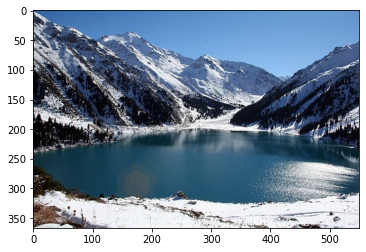

'a boat is on the water near a mountain '

In [37]:
url = "https://media-cdn.tripadvisor.com/media/photo-s/19/89/cc/c0/the-famous-place-nearly.jpg"
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)

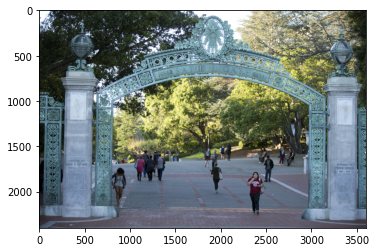

'a horse and carriage on a city street '

In [38]:
url = "https://www.eastbaytimes.com/wp-content/uploads/2019/03/generic-berkeley-00411-1-3.jpg"
img = get_image_from_url(url)
print_img(img)
model.get_caption(25,img, False)